# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
df = pd.read_csv('/home/arjun/Desktop/Datasets/Steel plate Defect/train.csv')

# Data Visualisation

In [3]:
df.head(10)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
5,5,1009,1033,899231,899307,409,22,26,47513,86,...,0.5909,-0.1890,0.8749,0,0,0,0,0,0,1
6,6,596,607,739072,7390760,204,21,21,22478,89,...,0.3158,-0.1497,0.5212,0,0,0,0,0,1,0
7,7,1673,1687,294065,294091,571,38,57,53142,77,...,0.0357,-0.2661,0.9408,1,0,0,0,0,0,0
8,8,507,521,203252,203261,101,25,12,12530,124,...,-0.6667,0.0305,0.3601,0,0,0,0,0,0,0
9,9,893,907,1341292,1341296,54,6,15,7052,87,...,0.4667,-0.1228,0.1400,0,0,0,0,0,1,0


In [4]:
# df.info()

In [5]:
# df.describe()

In [6]:
df.isna().sum()
# No null values. Thats good!

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [7]:
X = df.iloc[:19000,1:28]
y = df.iloc[:19000, 28:]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

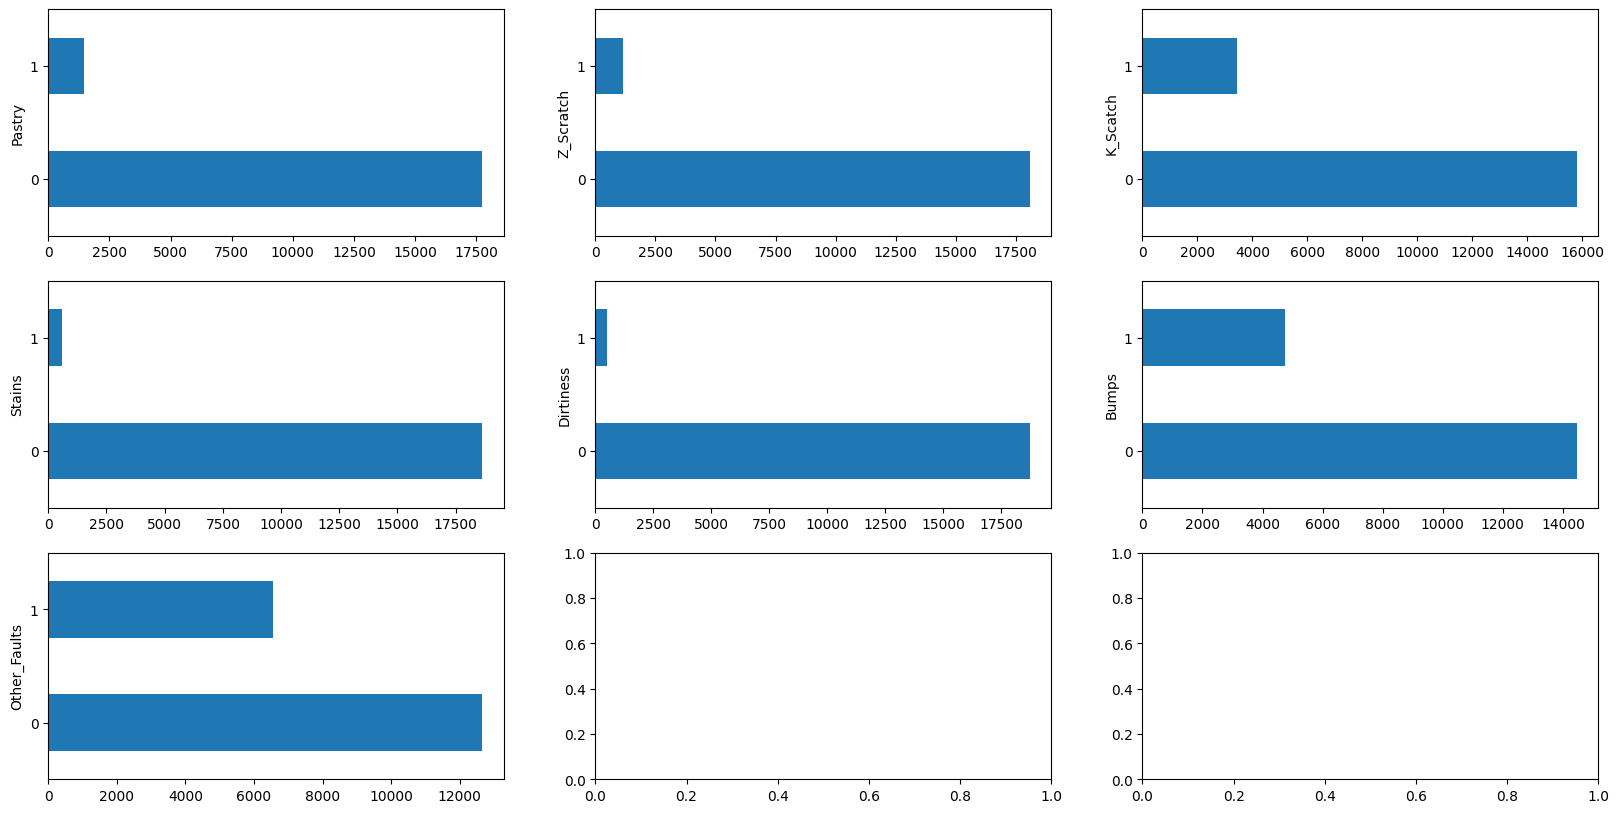

In [9]:
fig, axes = plt.subplots(3,3,figsize=(20,10))

for i,v in enumerate(y.columns):
    row, col = divmod(i, 3)  # Calculate row and column index automatically
    df[v].value_counts().plot(kind='barh', ax=axes[row, col])


<Axes: >

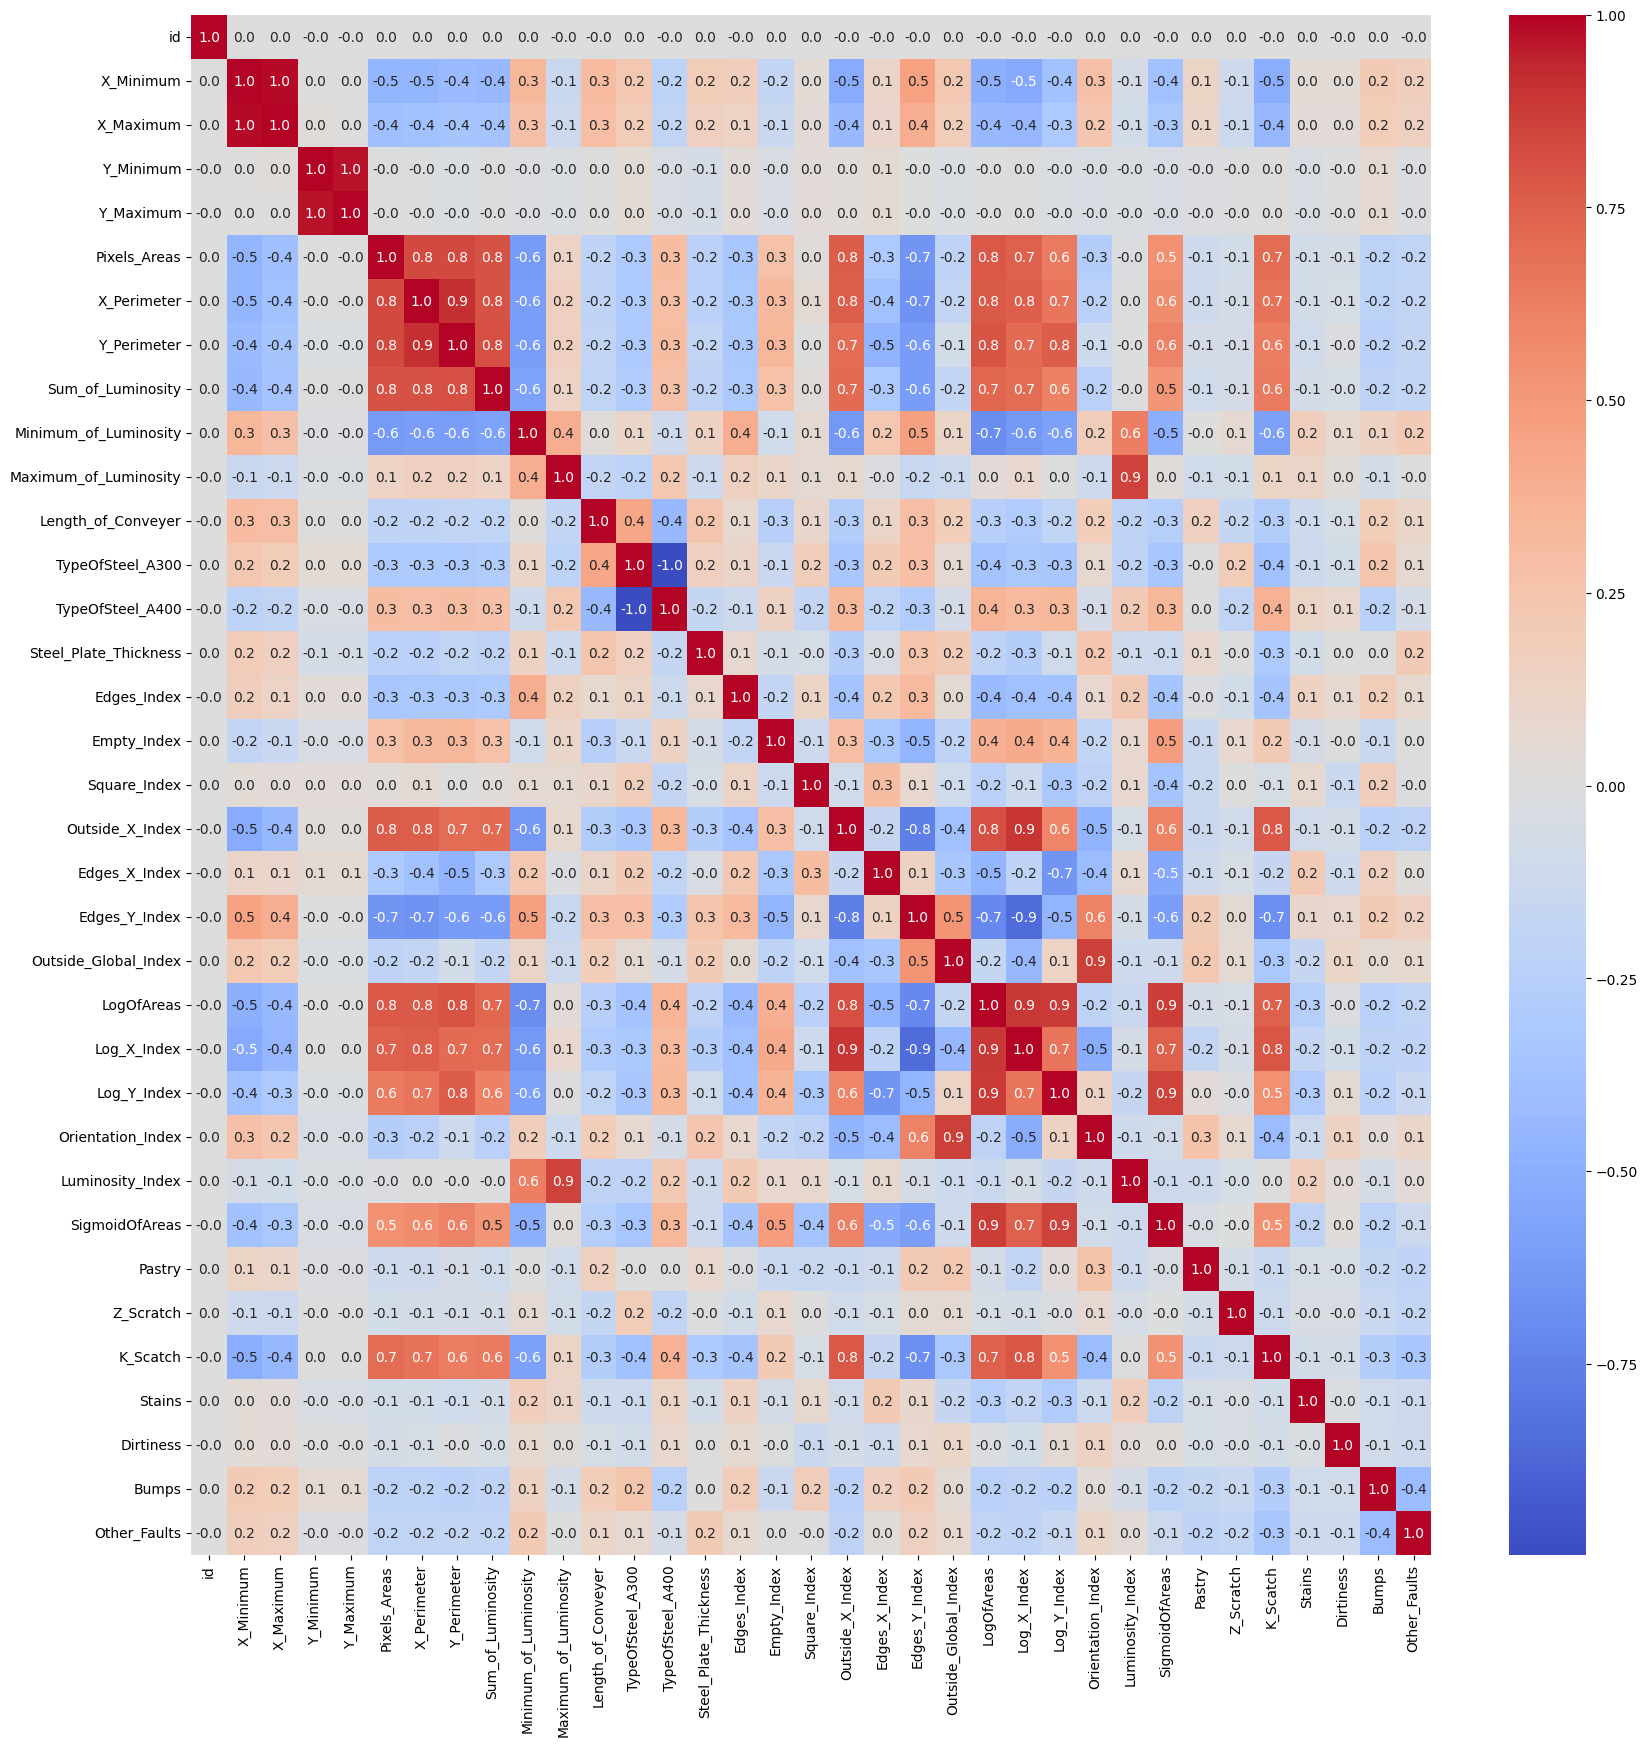

In [10]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='0.1f')

# Data Cleaning

In [12]:
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.237578,-0.329018,-0.494220,-0.494518,-0.447381,-0.493068,-0.585184,-0.429053,0.979687,0.798833,...,-0.523065,1.732014,0.761582,-1.227625,-1.668097,-0.875455,-1.702639,-1.235495,1.063136,-1.294123
1,0.183982,0.123420,-0.589537,-0.590238,-0.335811,-0.425724,-0.101144,-0.333726,-0.512917,-1.242238,...,-0.554762,-1.640392,0.761582,0.846767,0.213513,-1.142183,0.843770,1.311299,-1.340057,1.135472
2,-1.263250,-1.125789,0.189138,0.191827,2.595244,3.418491,3.514338,2.527886,-1.936097,0.869215,...,1.628094,-1.701994,-2.016896,-1.227625,2.078703,1.849272,2.019396,-0.231666,0.365355,1.288638
3,0.133169,0.069368,0.787982,0.793240,-0.395475,-0.448172,-0.348103,-0.426957,1.014399,0.376543,...,-0.554762,-1.078324,0.449496,0.846767,-0.199353,-1.142183,0.102074,1.157085,0.815590,-0.509334
4,1.561582,1.612862,-0.647210,-0.648148,-0.312266,-0.133900,0.027275,-0.325249,-0.096376,-1.242238,...,-0.242020,-1.818005,0.698713,0.846767,0.388091,0.217724,1.209444,1.667920,-0.889822,1.288036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,-1.259486,-1.077743,-0.163245,-0.162110,1.073931,0.904318,0.224842,0.918477,-1.554268,-0.116130,...,2.080302,0.066046,-1.499917,-1.227625,1.684096,1.985946,1.074657,-1.464766,-0.366485,1.288638
18996,0.496389,0.451738,-0.580607,-0.581273,-0.432665,-0.493068,-0.446887,-0.411751,1.361516,0.939597,...,-0.569554,0.607879,0.523673,0.846767,-0.817931,-1.142183,-0.331856,1.157085,1.397075,-1.073551
18997,0.906657,0.902174,-0.693125,-0.694276,-0.413401,-0.442560,-0.437008,-0.395125,0.597858,-0.256893,...,-0.459671,1.467618,0.761582,0.846767,-0.418594,-0.292455,-0.331856,0.746940,0.269825,-0.287258
18998,-0.367434,-0.435120,-0.433655,-0.433642,-0.410191,-0.397664,-0.417252,-0.396925,0.736705,0.376543,...,-0.322318,0.472983,-0.471839,-1.227625,-0.368940,0.019547,-0.458018,-0.620278,0.608748,-0.126870


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Models

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score